# Задание

Набор данных ex8data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X1 и X2 - задержка в мс и пропускная способность в мб/c серверов. Среди серверов необходимо выделить те, характеристики которых аномальные. Набор разделен на обучающую выборку (X), которая не содержит меток классов, а также валидационную (Xval, yval), на которой необходимо оценить качество алгоритма выявления аномалий. В метках классов 0 обозначает отсутствие аномалии, а 1, соответственно, ее наличие.

Набор данных ex8data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит 11-мерную переменную X - координаты точек, среди которых необходимо выделить аномальные. Набор разделен на обучающую выборку (X), которая не содержит меток классов, а также валидационную (Xval, yval), на которой необходимо оценить качество алгоритма выявления аномалий.

1. Загрузите данные ex8data1.mat из файла.
2. Постройте график загруженных данных в виде диаграммы рассеяния.
3. Представьте данные в виде двух независимых нормально распределенных случайных величин.
4. Оцените параметры распределений случайных величин.
5. Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.
6. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.
7. Выделите аномальные наблюдения на графике из пункта 5 с учетом выбранного порогового значения.
8. Загрузите данные ex8data2.mat из файла.
9. Представьте данные в виде 11-мерной нормально распределенной случайной величины.
10. Оцените параметры распределения случайной величины.
11. Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.
12. Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
import numpy as np
from scipy.stats import norm, multivariate_normal
from sklearn.metrics import f1_score

%matplotlib inline

In [12]:
# Загрузите данные ex8data1.mat из файла.
data = loadmat('Data/Lab 8/ex8data1.mat')
X, X_val, y_val = data['X'], data['Xval'], data['yval'].ravel()
X.shape

(307, 2)

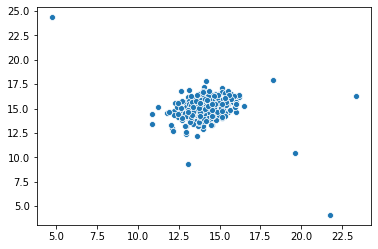

In [13]:
# Постройте график загруженных данных в виде диаграммы рассеяния.
sns.scatterplot(X[:, 0], X[:, 1])
plt.show()

14.112225783945592 1.353747174879607


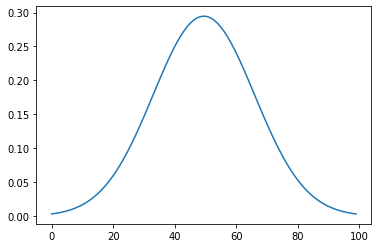

14.99771050813621 1.3075723042450764


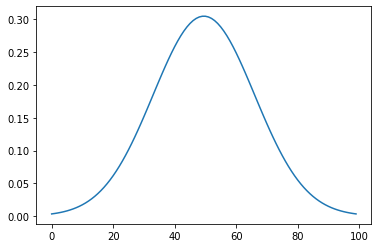

In [18]:
#Представьте данные в виде двух независимых нормально распределенных случайных величин.
#Оцените параметры распределений случайных величин.

std1 = np.std(X[:, 0])
mean1 = np.mean(X[:, 0])
print(mean1, std1)
plt.plot(norm.pdf(np.linspace(mean1-3*std1, mean1+3*std1, 100), mean1, std1))
plt.show()

std2 = np.std(X[:, 1])
mean2 = np.mean(X[:, 1])
print(mean2, std2)
plt.plot(norm.pdf(np.linspace(mean2-3*std2, mean2+3*std2, 100), mean2, std2))
plt.show()

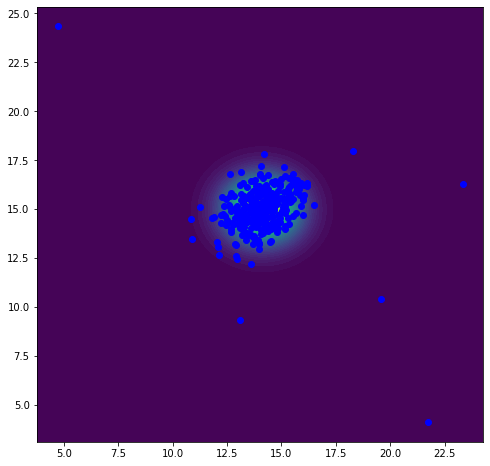

In [30]:
# Постройте график плотности распределения получившейся случайной величины в виде изолиний, совместив его с графиком из пункта 2.

x, y = np.mgrid[np.min(X[:, 0])-1:np.max(X[:, 0])+1:.1, np.min(X[:, 1])-1:np.max(X[:, 1])+1:.1]
pos = np.dstack((x, y))
rv = multivariate_normal([mean1, mean2], [[std1, 0.], [0., std2]])
plt.figure(figsize=(8, 8))
plt.contourf(x, y, rv.pdf(pos), levels=np.linspace(0, rv.pdf([mean1, mean2]), 50))
plt.scatter(X[:, 0], X[:, 1], color='b')
plt.show()

In [31]:
# Подберите значение порога для обнаружения аномалий на основе валидационной выборки. В качестве метрики используйте F1-меру.

max_pdf = rv.pdf([mean1, mean2])
pdf_threshold = np.linspace(0, max_pdf, 1000)

f1_scores = []
for thr in pdf_threshold:
    y_pred = (rv.pdf(X_val) < thr).astype(int)
    f1_scores.append(f1_score(y_pred=y_pred, y_true=y_val)) 

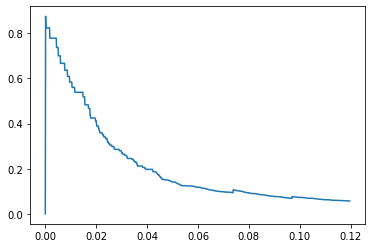

In [32]:
plt.plot(pdf_threshold, f1_scores)

In [33]:
f1_scores = np.array(f1_scores)
potential_thr = pdf_threshold[f1_scores==f1_scores.max()]
potential_thr

array([0.00011974])

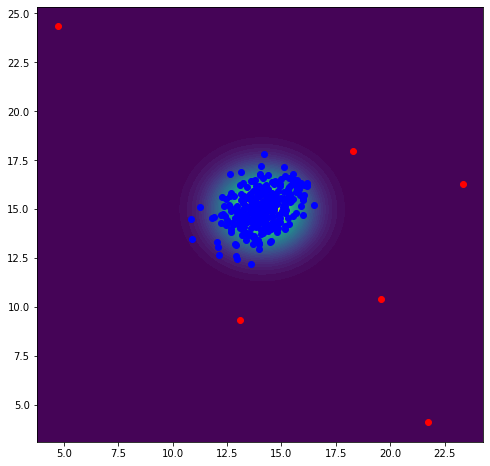

In [34]:
# Выделите аномальные наблюдения на графике из пункта 5 с учетом выбранного порогового значения.

x, y = np.mgrid[np.min(X[:, 0])-1:np.max(X[:, 0])+1:.1, np.min(X[:, 1])-1:np.max(X[:, 1])+1:.1]
pos = np.dstack((x, y))
rv = multivariate_normal([mean1, mean2], [[std1**2, 0.], [0., std2**2]])
plt.figure(figsize=(8, 8))
plt.contourf(x, y, rv.pdf(pos), levels=np.linspace(0, rv.pdf([mean1, mean2]), 50))

mask_anom = rv.pdf(X) < np.mean(potential_thr)
plt.scatter(X[mask_anom][:, 0], X[mask_anom][:, 1], color='r')
plt.scatter(X[~mask_anom][:, 0], X[~mask_anom][:, 1], color='b')

In [36]:
#Загрузите данные ex8data2.mat из файла.
data = loadmat('Data/Lab 8/ex8data2.mat')
X, X_val, y_val = data['X'], data['Xval'], data['yval'].ravel()

In [38]:
#Представьте данные в виде 11-мерной нормально распределенной случайной величины.
#Оцените параметры распределения случайной величины.

mean_vec = np.mean(X, axis=0)
cov_mtx = np.cov(X.T)

In [40]:
rv = multivariate_normal(mean_vec, cov_mtx)

max_pdf = rv.pdf(mean_vec)
pdf_threshold = np.linspace(0, max_pdf, 1000)

f1_scores = []
for thr in pdf_threshold:
    y_pred = (rv.pdf(X_val) < thr).astype(int)
    f1_scores.append(f1_score(y_pred=y_pred, y_true=y_val)) 

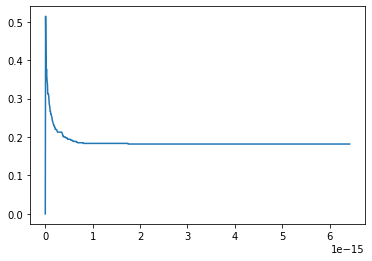

In [41]:
plt.plot(pdf_threshold, f1_scores)

In [42]:
f1_scores = np.array(f1_scores)
potential_thr = pdf_threshold[f1_scores==f1_scores.max()]
potential_thr

array([6.42960646e-18])

In [43]:
# Выделите аномальные наблюдения в обучающей выборке. Сколько их было обнаружено? Какой был подобран порог?
y_pred = rv.pdf(X) < np.mean(potential_thr)
y_pred.sum()

247